<a href="https://colab.research.google.com/github/namitasathish/Movie-recommendation-system-/blob/main/movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Data Collection

In [2]:
data=pd.read_csv("/content/movies.csv")

In [3]:
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
data.shape

(4803, 24)

#Feature Selection

In [5]:
feature=["genres","keywords","tagline","cast","director"]
print(feature)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [6]:
data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

Replacing null values

In [7]:
for f in feature:
  data[f]=data[f].fillna("")

In [8]:
data.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

Combining fields

In [9]:
combined=data["genres"]+" "+data["keywords"]+" "+data["tagline"]+" "+data["cast"]+" "+data["director"]

#Textual data to Feature data

In [10]:
vec=TfidfVectorizer()

In [11]:
fvec=vec.fit_transform(combined)


In [12]:
model=cosine_similarity(fvec)

In [13]:
model.shape


(4803, 4803)

#User Interaction

In [14]:
movie=input("Enter your favorite movie")

Enter your favorite movieiron man


In [15]:
allmovies=data["title"].tolist()

In [16]:
cmatch=difflib.get_close_matches(movie,allmovies)

In [17]:
print(cmatch)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [18]:
closematch=cmatch[0]

In [19]:
print(closematch)

Iron Man


index of movie

In [20]:
index=data[data.title==closematch]["index"].values[0]
print(index)

68


#Getting list of simillar movies

In [21]:
similarityscore=list(enumerate(model[index]))


In [22]:
len(similarityscore)

4803

score for simillar movies

In [23]:

sortedm=sorted(similarityscore, key=lambda x:x[1],reverse=True)


In [24]:

print(type(sortedm))


del sortedm


sortedm=sorted(similarityscore, key=lambda x:x[1],reverse=True)


<class 'list'>


printing the name of the movies

In [25]:
print("Movies suggested for you: \n")
i=1
for movie in sortedm :
  index=movie[0]
  title=data[data.index==index]["title"].values[0]
  if(i<11):
    print (i,".",title)
    i+=1

Movies suggested for you: 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made


#Movie recomendation system

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


data = pd.read_csv("/content/movies.csv")

# Fill missing values
features = ["genres", "keywords", "tagline", "cast", "director"]
for feature in features:
    data[feature] = data[feature].fillna("")

# Combine
combined = data["genres"] + " " + data["keywords"] + " " + data["tagline"] + " " + data["cast"] + " " + data["director"]


vec = TfidfVectorizer()
fvec = vec.fit_transform(combined)


model = cosine_similarity(fvec)


movie = input("Enter your favorite movie or the genre you like: ")

# Convert movie titles to list
all_movies = data["title"].tolist()

# Find close matches to the input movie
close_matches = difflib.get_close_matches(movie, all_movies)

if not close_matches:
    print("No close matches found.")
else:

    close_match = close_matches[0]


    index = data[data.title == close_match]["index"].values[0]

    # similarity scores
    similarity_score = list(enumerate(model[index]))

    # Sort in descending order
    sorted_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    # Print
    print("\n")
    print("Movies suggested for you: \n")
    i = 1
    for movie in sorted_movies:
        idx = movie[0]
        title = data[data.index == idx]["title"].values[0]
        if i <= 10:
            print(f"{i}. {title}")
            i += 1

Enter your favorite movie or the genre you like: iron man


Movies suggested for you: 

1. Iron Man
2. Iron Man 2
3. Iron Man 3
4. Avengers: Age of Ultron
5. The Avengers
6. Captain America: Civil War
7. Captain America: The Winter Soldier
8. Ant-Man
9. X-Men
10. Made


#Bar graph to represent similarity

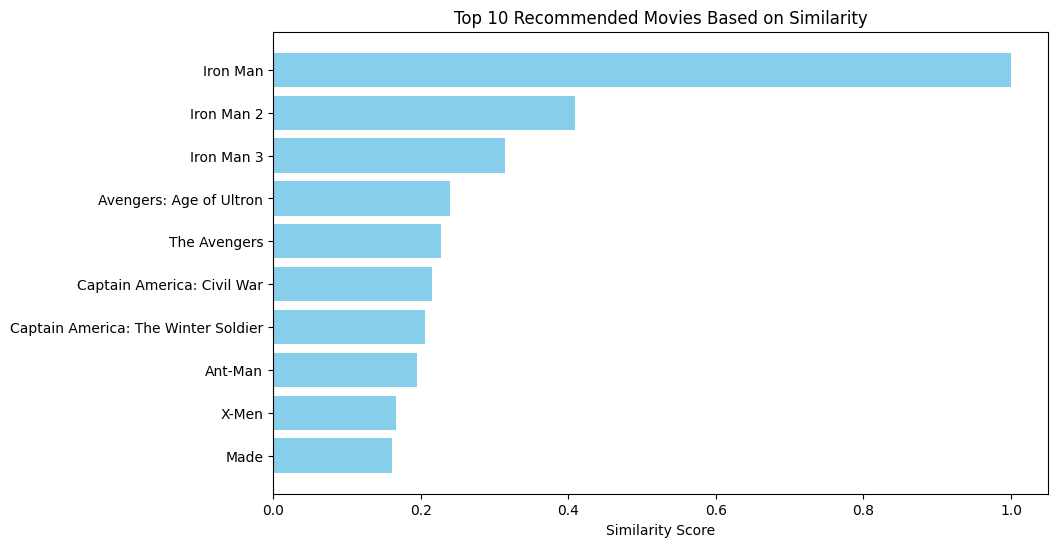

In [27]:
import matplotlib.pyplot as plt


recommended_titles = []
similarity_scores = []

for movie in sorted_movies[:10]:
    idx = movie[0]
    title = data[data.index == idx]["title"].values[0]
    score = movie[1]
    recommended_titles.append(title)
    similarity_scores.append(score)

plt.figure(figsize=(10, 6))
plt.barh(recommended_titles, similarity_scores, color='skyblue')
plt.xlabel('Similarity Score')
plt.title('Top 10 Recommended Movies Based on Similarity')
plt.gca().invert_yaxis()
plt.show()


#Correlation between different movies recomended

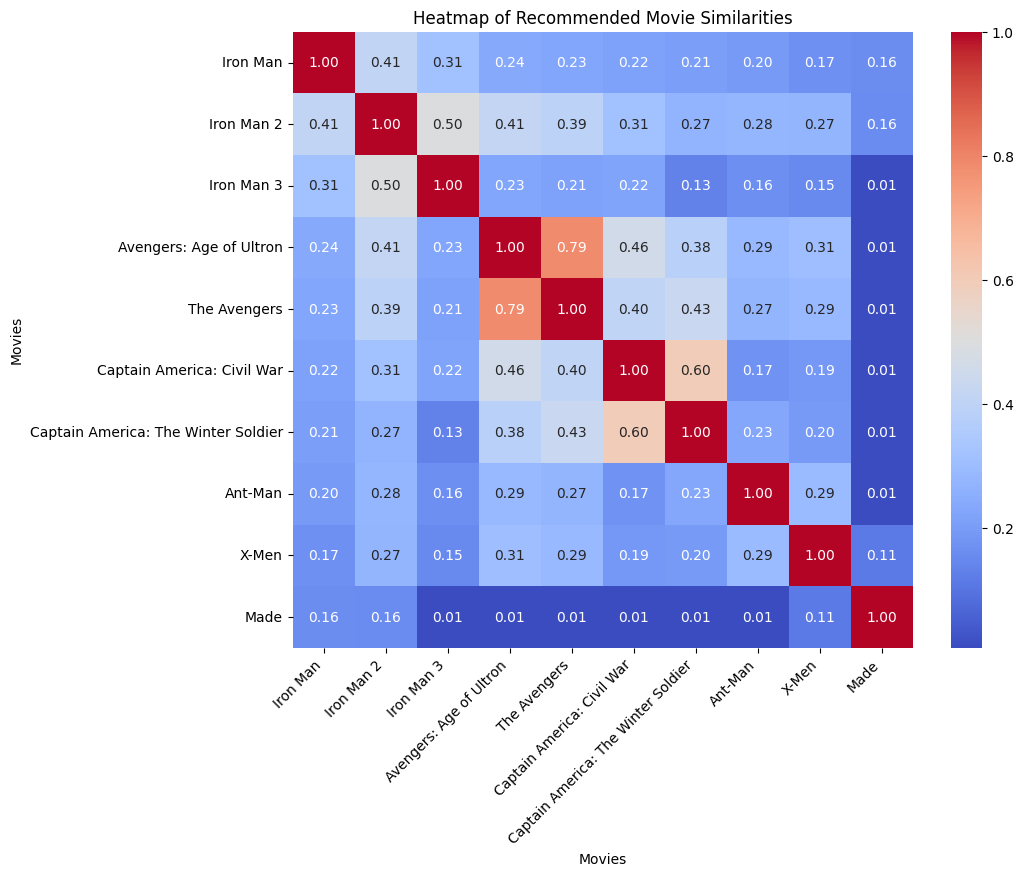

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


recommended_titles = []
recommended_indices = []

for movie in sorted_movies[:10]:
    idx = movie[0]
    title = data[data.index == idx]["title"].values[0]
    recommended_titles.append(title)
    recommended_indices.append(idx)


recommended = model[recommended_indices, :][:, recommended_indices]


similarity_df = pd.DataFrame(recommended, index=recommended_titles, columns=recommended_titles)


plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Recommended Movie Similarities")
plt.xlabel("Movies")
plt.ylabel("Movies")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()
